In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.filters import gaussian
from skimage.io import imread
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

## Grayscale + Blur

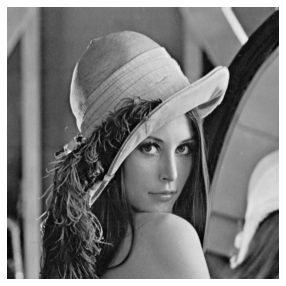

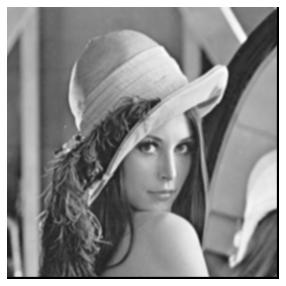

In [ ]:
img = imread('image_lenna.png')

gray_image = 0.21 * img[:,:,0] + 0.71 * img[:,:,1] + 0.07 * img[:,:,2]

kernel_size = 5
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
blurred_image = np.zeros_like(gray_image)
for i in range(gray_image.shape[0]-kernel_size+1):
  for j in range(gray_image.shape[1]-kernel_size+1):
    blurred_image[i,j] = np.mean(gray_image[i:i+kernel_size,j:j+kernel_size])

fig = plt.figure(figsize=(5,5))
plt.imshow(gray_image, cmap="gray")
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.imshow(blurred_image, cmap="gray")
plt.axis('off')
plt.show()


# Linear

## Box blur filter

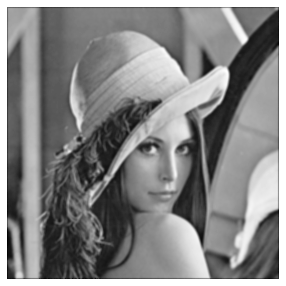

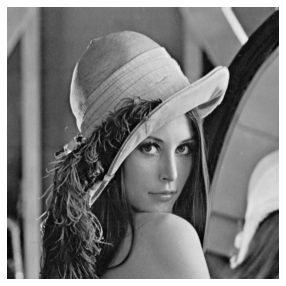

In [ ]:
def box_blur(image, kernel_size):
    filtered_image = image.copy()
    offset = kernel_size // 2
    for i in range(offset, len(image) - offset):
        for j in range(offset, len(image[0]) - offset):
            kernel = []
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    kernel.append(image[i+x][j+y])
            filtered_image[i][j] = sum(kernel) / (kernel_size * kernel_size)
    return filtered_image
kernel_size = 4
box_blur_image = box_blur(gray_image, kernel_size)

fig = plt.figure(figsize=(5,5))
plt.imshow(box_blur_image, cmap="gray")
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.imshow(gray_image, cmap="gray")
plt.axis('off')
plt.show()

## Gaussian filter

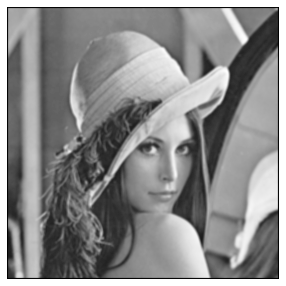

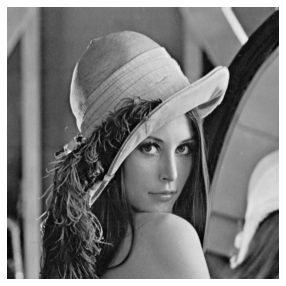

In [ ]:
def gaussian_filter(img, sigma):
    kernel = np.zeros((sigma, sigma))
    for i in range(sigma): 
        for j in range(sigma):
            kernel[i, j] = (1 / ((2 * np.pi * (sigma ** 2))) * np.exp(-(((i ** 2) + (j ** 2))/(2*(sigma** 2)))))
            
    filtered_img = np.zeros_like(img)
    k = sigma//2
    for x in range(k, img.shape[0]-k):
        for y in range(k, img.shape[1]-k):
            filtered_img[x,y] = np.sum(img[x-k:x+k+1, y-k:y+k+1] * kernel)
    scaled_img = 255*(filtered_img/np.max(filtered_img))
    return scaled_img

sigma = 5
gaussian_image = gaussian_filter(gray_image, sigma)

fig = plt.figure(figsize=(5,5))
plt.imshow(gaussian_image, cmap="gray")
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.imshow(gray_image, cmap="gray")
plt.axis('off')
plt.show()

# Non-Linear

## Median filter

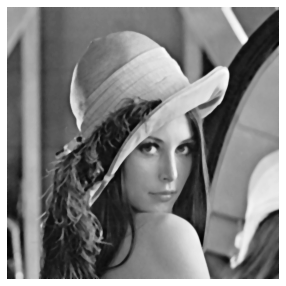

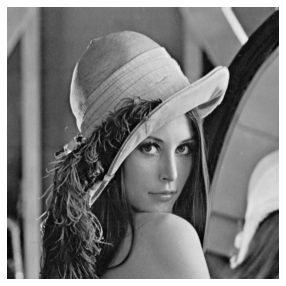

In [ ]:
def median_filter(image, kernel_size):
    filtered_image = image.copy()
    offset = kernel_size // 2
    for i in range(offset, len(image) - offset):
        for j in range(offset, len(image[0]) - offset):
            kernel = []
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    kernel.append(image[i+x][j+y])
            kernel.sort()
            filtered_image[i][j] = kernel[len(kernel) // 2]
    return filtered_image

kernel_size = 4
median_image = median_filter(gray_image, kernel_size)

fig = plt.figure(figsize=(5,5))
plt.imshow(median_image, cmap="gray")
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.imshow(gray_image, cmap="gray")
plt.axis('off')
plt.show()

## Bilateral filter

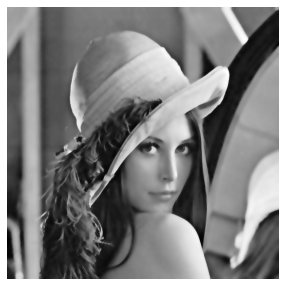

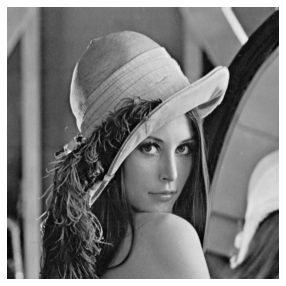

In [ ]:
def bilateral_filter(image, sigma_s, sigma_r, box_size):
    height, width = image.shape
    filtered_image = np.empty(image.shape)
    d = round(box_size / 2)

    for x in range(height):
        for y in range(width):
            normalization_factor = 0
            new_pixel_value = 0

            for i in range(x - d, x + d):
                for j in range(y - d, y + d):
                    if (i >= 0 and i < height and j >= 0 and j < width):
                        g_dist = math.sqrt((x - i) ** 2 + (y - j) ** 2)
                        p_dist = abs(int(image[x, y]) - int(image[i, j]))
                        weight = math.exp(-g_dist ** 2 / (2 * sigma_s ** 2)) * math.exp(-p_dist ** 2 / (2 * sigma_r ** 2))
                        new_pixel_value += weight * image[i, j]
                        normalization_factor += weight
            filtered_image[x, y] = int(round(new_pixel_value / normalization_factor))
    return filtered_image
    
sigma_s=4
sigma_r=40
box_size=7

bilateral_image = bilateral_filter(gray_image, sigma_s, sigma_r, box_size)

fig = plt.figure(figsize=(5,5))
plt.imshow(bilateral_image/255, cmap="gray")
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.imshow(gray_image, cmap="gray")
plt.axis('off')
plt.show()

# Analiza

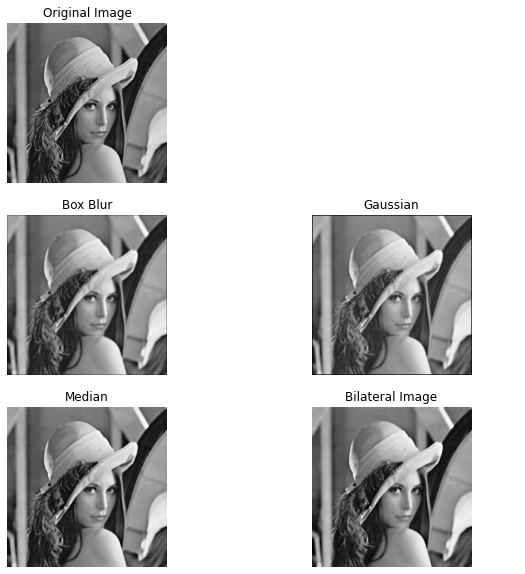

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[1, 0].imshow(box_blur_image, cmap='gray')
axs[1, 0].set_title("Box Blur")
axs[1, 1].imshow(gaussian_image, cmap='gray')
axs[1, 1].set_title("Gaussian")
axs[2, 0].imshow(median_image, cmap='gray')
axs[2, 0].set_title("Median")
axs[2, 1].imshow(bilateral_image, cmap='gray')
axs[2, 1].set_title("Bilateral Image")

for ax in axs.flat:
    ax.axis('off')

plt.show()

In [ ]:
# calculate MSE
mse_blur = mean_squared_error(gray_image, blurred_image)
print("MSE for Blur: ", mse_blur)

mse_box = mean_squared_error(gray_image, box_blur_image)
print("MSE for Box blur: ", mse_box)

mse_gaussian = mean_squared_error(gray_image, gaussian_image)
print("MSE for Gaussian : ", mse_gaussian)

mse_median = mean_squared_error(gray_image, median_image)
print("MSE for Median: ", mse_median)

mse_gaussian = mean_squared_error(gray_image, bilateral_image)
print("MSE for Bilateral: ", mse_gaussian)


# calculate PSNR
psnr_blur = peak_signal_noise_ratio(gray_image, blurred_image, data_range=255)
print("PSNR for Blur: ", psnr_blur)

psnr_box = peak_signal_noise_ratio(gray_image, box_blur_image, data_range=255)
print("PSNR for Box blur: ", psnr_box)

psnr_gaussian = peak_signal_noise_ratio(gray_image, gaussian_image, data_range=255)
print("PSNR for Gaussian: ", psnr_gaussian)

psnr_median = peak_signal_noise_ratio(gray_image, gaussian_image, data_range=255)
print("PSNR for Median: ", psnr_median)

psnr_gaussian = peak_signal_noise_ratio(gray_image, bilateral_image, data_range=255)
print("PSNR for Bilateral: ", psnr_gaussian)

MSE for Blur:  560.9344224329936
MSE for Box blur:  4870.089830755418
MSE for Gaussian :  527.5376588473422
MSE for Median:  50.72139810752867
MSE for Bilateral:  43.5883616493225
PSNR for Blur:  20.641682690238472
PSNR for Box blur:  11.255433888439175
PSNR for Gaussian:  20.908268932094202
PSNR for Median:  20.908268932094202
PSNR for Bilateral:  31.737098153196122
